VPR_CA2
ref- https://www.youtube.com/watch?v=jztwpsIzEGc&list=WL&index=5&t=4277s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)
import os

2.17.0


In [ ]:
gpus= tf.config.experimental.list_physical_devices('GPU')
print(gpus) #empty parentheses means we are not using any gpu

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
import cv2
import imghdr

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#only used the test folder for less त्रास
data= tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/archive/DATASET/TEST')

Found 2512 files belonging to 2 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator= data.as_numpy_iterator()

In [ ]:
batch= data_iterator.next()

In [ ]:
len(batch)

2

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[0].max()

255.0

In [ ]:
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int32)

0 -> organic (O) 
1 -> recyclable (R)


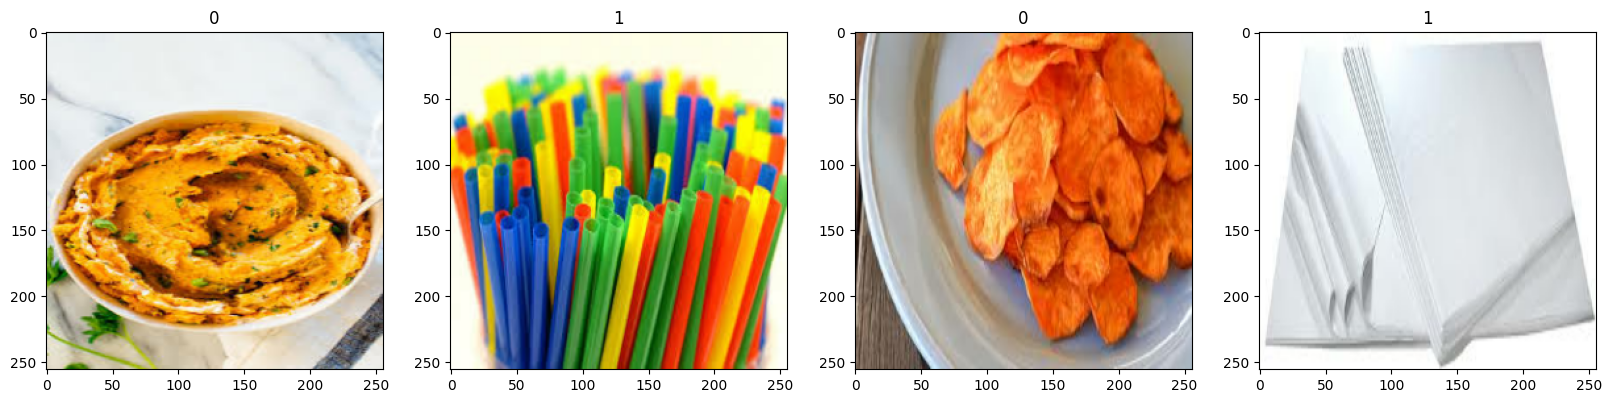

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

print("0 -> organic (O) \n1 -> recyclable (R)")

0 -> organic (O)
1 -> recyclable (R)

In [ ]:
scaled= batch[0]/255

In [ ]:
scaled.max()

1.0

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
len(data)

79

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size

55

In [ ]:
val_size

16

In [ ]:
test_size

8

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(val)

16

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model= Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='/content/drive/MyDrive/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
##steps_per_epoch = int(0.15 * 494)  #train on limited number of batches
#validation_steps = int(0.15 * 142)
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
hist = model.fit(train,
                 epochs=8,
                 validation_data=val,
                 callbacks=[tensorboard_callback])

Epoch 1/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 329s 6s/step - accuracy: 0.6392 - loss: 0.6981 - val_accuracy: 0.8574 - val_loss: 0.3430
Epoch 2/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - accuracy: 0.8662 - loss: 0.3268 - val_accuracy: 0.9375 - val_loss: 0.1803
Epoch 3/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 27s 504ms/step - accuracy: 0.9065 - loss: 0.2327 - val_accuracy: 0.9180 - val_loss: 0.1963
Epoch 4/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 316ms/step - accuracy: 0.9253 - loss: 0.2084 - val_accuracy: 0.9395 - val_loss: 0.1661
Epoch 5/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.9325 - loss: 0.1849 - val_accuracy: 0.9355 - val_loss: 0.1629
Epoch 6/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - accuracy: 0.9381 - loss: 0.1590 - val_accuracy: 0.9453 - val_loss: 0.1411
Epoch 7/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 294ms/step - accuracy: 0.9601 - loss: 0.1258 - val_accuracy: 0.9629 - val_loss: 0.1206
Epoch 8/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 303ms/step - accuracy: 0.9610 - loss: 0.1068 - val_accuracy: 0.94

In [ ]:
  hist.history

{'accuracy': [0.738068163394928,
  0.8931818008422852,
  0.9119318127632141,
  0.9318181872367859,
  0.9380682110786438,
  0.9448863863945007,
  0.9607954621315002,
  0.9596590995788574],
 'loss': [0.5701284408569336,
  0.26418372988700867,
  0.22290797531604767,
  0.187381312251091,
  0.16677364706993103,
  0.14871226251125336,
  0.11826569586992264,
  0.11035310477018356],
 'val_accuracy': [0.857421875,
  0.9375,
  0.91796875,
  0.939453125,
  0.935546875,
  0.9453125,
  0.962890625,
  0.943359375],
 'val_loss': [0.3430372476577759,
  0.18031565845012665,
  0.19626949727535248,
  0.1660761833190918,
  0.16294977068901062,
  0.14113596081733704,
  0.12057912349700928,
  0.16707302629947662]}

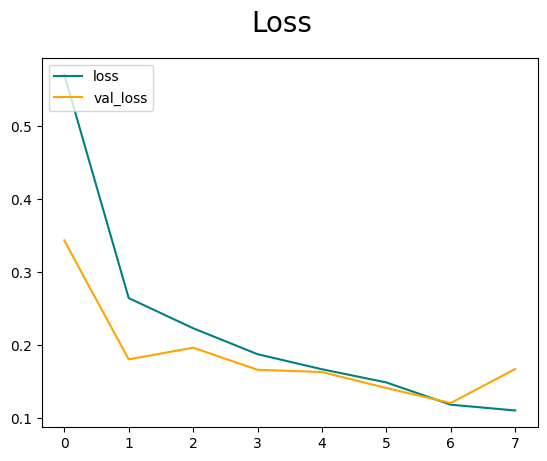

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

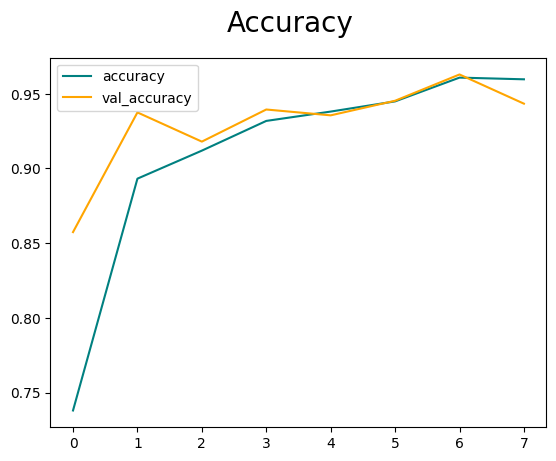

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

'''
ŷ is the output of your model for a given input, while y is the actual observed value.
For example, in linear regression, the predicted value ŷ is computed as:
y^=mx+c
wher e m and c are the slope and intercept of the line.
'''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


'\nŷ is the output of your model for a given input, while y is the actual observed value.\nFor example, in linear regression, the predicted value ŷ is computed as:\ny^=mx+c\nwher e m and c are the slope and intercept of the line.\n'

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{ re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9670329689979553, Recall:0.8979591727256775, Accuracy:0.9458333253860474


In [ ]:
import cv2

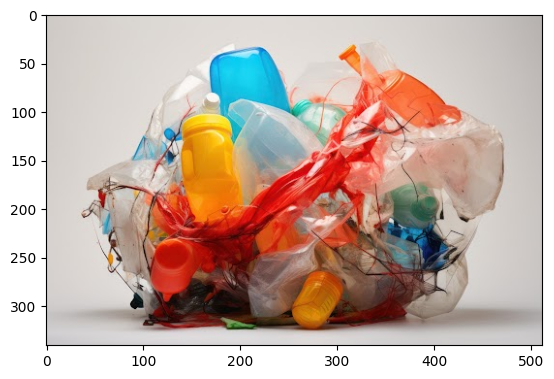

In [ ]:
img = cv2.imread('recyclablethisis1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

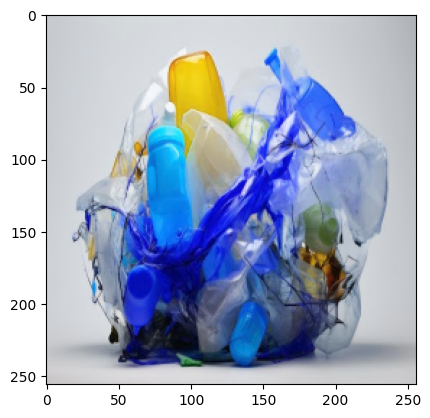

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Recyclable')
else:
    print(f'Predicted class is Organic')

Predicted class is Recyclable


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','wasteclassifier103.h5'))

In [ ]:
new_model = load_model(os.path.join("models",'wasteclassifier103.h5'))

In [ ]:
yhatnew= new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


In [ ]:
if yhatnew > 0.5:
    print(f'Predicted class is Recyclable')
else:
    print(f'Predicted class is Organic')

Predicted class is Recyclable


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
  # Load the trained model
  model_path = os.path.join("models", "wasteclassifier103.h5")
  new_model = load_model(model_path)

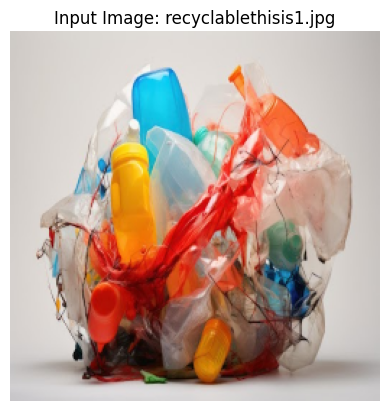

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Recyclable


In [ ]:
#EXAMPLE FOR VIDEO
#-----------------
# Loading and processing the image
image_path = 'recyclablethisis1.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img_rgb, (256, 256))

# Display the image
plt.imshow(resize.numpy().astype(int))
plt.title("Input Image: recyclablethisis1.jpg")
plt.axis('off')
plt.show()

# Normalize the image
img_scaled = resize / 255.0

# Expand dimensions to fit the model's expected input
img_expanded = np.expand_dims(img_scaled, axis=0)

# Make prediction
prediction = model.predict(img_expanded)

# Interpret the prediction
if prediction > 0.5:
    print('Predicted class: Recyclable')
else:
    print('Predicted class: Organic')